## Exploratory analysis of the second iteration of our manually annotated dataset

Download dataset (V2)

In [1]:
!wget https://sensor-cdt-group-project.s3.eu-north-1.amazonaws.com/data.zip -O finetune_data.zip
!mkdir -p finetune_data
!unzip finetune_data.zip -d finetune_data

--2024-07-17 14:44:17--  https://sensor-cdt-group-project.s3.eu-north-1.amazonaws.com/data.zip
Resolving sensor-cdt-group-project.s3.eu-north-1.amazonaws.com (sensor-cdt-group-project.s3.eu-north-1.amazonaws.com)... 52.95.169.48, 16.12.9.34
Connecting to sensor-cdt-group-project.s3.eu-north-1.amazonaws.com (sensor-cdt-group-project.s3.eu-north-1.amazonaws.com)|52.95.169.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1751308166 (1.6G) [binary/octet-stream]
Saving to: ‘finetune_data.zip’

finetune_data.zip   100%[===================>]   1.63G  29.0MB/s    in 61s     

2024-07-17 14:45:19 (27.3 MB/s) - ‘finetune_data.zip’ saved [1751308166/1751308166]

Archive:  finetune_data.zip
replace finetune_data/content/content/flat_split/Mostly Grass_Fran_672_970_388.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
# count number of downloaded images (should be ~95K)
!ls -l finetune_data/content/content/flat_split/ | wc -l

94649


In [3]:
# check metadata csv file (dataset-v2.csv) is in google drive

# mount google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# peek contents of dataset-v2.csv
!head /content/drive/MyDrive/team_challenge/dataset-v2.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
"annotation_id","annotator","choice","created_at","id","image","lead_time","updated_at"
120,"4","Grass","2024-07-11T09:42:46.334102Z",18157,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_0_194.jpg",11.992,"2024-07-11T09:42:46.334134Z"
225,"4","{""choices"":[""Grass"",""Soil""]}","2024-07-11T10:07:20.670501Z",18166,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_1164_776.jpg",2.832,"2024-07-11T10:07:20.670533Z"
231,"4","Grass","2024-07-11T10:07:38.852906Z",18168,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_1358_0.jpg",7.948,"2024-07-11T10:07:38.852941Z"
232,"4","{""choices"":[""Grass"",""Soil""]}","2024-07-11T10:07:43.762465Z",18169,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_1358_194.jpg",4.056,"2024-07-11T10:07:43.762499Z"
235,"4","{""choices"":[""Grass"",""Soil""]}","202

Generate dataframe

In [4]:
# Generate df and make image_name column

import pandas as pd

csv_path = "/content/drive/MyDrive/team_challenge/dataset-v2.csv"
main_df = pd.read_csv(csv_path)
main_df['image_name'] = main_df['image'].apply(lambda x: x.split('/')[-1].replace('%20', ' ')) # Ensure URL encoded spaces are replaced

main_df

,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,image_name
0,120,4,Grass,2024-07-11T09:42:46.334102Z,18157,/data/local-files/?d=content/content/flat_spli...,11.992,2024-07-11T09:42:46.334134Z,Bare Soil_Fran_0_0_194.jpg
1,225,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:07:20.670501Z,18166,/data/local-files/?d=content/content/flat_spli...,2.832,2024-07-11T10:07:20.670533Z,Bare Soil_Fran_0_1164_776.jpg
2,231,4,Grass,2024-07-11T10:07:38.852906Z,18168,/data/local-files/?d=content/content/flat_spli...,7.948,2024-07-11T10:07:38.852941Z,Bare Soil_Fran_0_1358_0.jpg
3,232,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:07:43.762465Z,18169,/data/local-files/?d=content/content/flat_spli...,4.056,2024-07-11T10:07:43.762499Z,Bare Soil_Fran_0_1358_194.jpg
4,235,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:08:06.786139Z,18171,/data/local-files/?d=content/content/flat_spli...,17.455,2024-07-11T10:08:06.786172Z,Bare Soil_Fran_0_1358_582.jpg
...,...,...,...,...,...,...,...,...,...
2923,161,3,Grass,2024-07-11T10:01:17.978649Z,98643,/data/local-files/?d=content/content/flat_spli...,1.779,2024-07-11T10:01:17.978677Z,Sheep Wool_Leon_895_582_970.jpg
2924,1063,3,Grass,2024-07-12T09:31:22.721232Z,99078,/data/local-files/?d=content/content/flat_spli...,1.625,2024-07-12T09:31:22.721263Z,Sheep Wool_Leon_900_582_1312.jpg
2925,1061,3,"{""choices"":[""Grass"",""Soil""]}",2024-07-12T09:31:17.727774Z,100732,/data/local-files/?d=content/content/flat_spli...,2.451,2024-07-12T09:31:17.727804Z,Sheep Wool_Leon_919_194_0.jpg
2926,207,3,Grass,2024-07-11T10:05:55.685947Z,106714,/data/local-files/?d=content/content/flat_spli...,2.392,2024-07-11T10:05:55.685980Z,Unclassified_Maxwell_1028_1948_776.jpg


In [5]:
# show class choices

all_choices = list(main_df['choice'].unique())
all_choices

['Grass',
 '{"choices":["Grass","Soil"]}',
 '{"choices":["Grass","Artifact"]}',
 'Artifact',
 '{"choices":["Grass","Dung","Soil"]}',
 'Soil',
 '{"choices":["Grass","Soil","Artifact"]}',
 '{"choices":["Dung","Soil"]}',
 '{"choices":["Clover","Grass"]}',
 '{"choices":["Grass","Dung"]}',
 '{"choices":["Clover","Grass","Soil"]}',
 'Clover',
 '{"choices":["Clover","Grass","Dung"]}',
 '{"choices":["Grass","Sheep Dung"]}',
 '{"choices":["Grass","Dung","Artifact"]}',
 '{"choices":["Soil","Artifact"]}',
 '{"choices":["Clover","Grass","Sheep Dung"]}',
 '{"choices":["Dung","Soil","Artifact"]}',
 nan,
 '{"choices":["Clover","Grass","Artifact"]}']

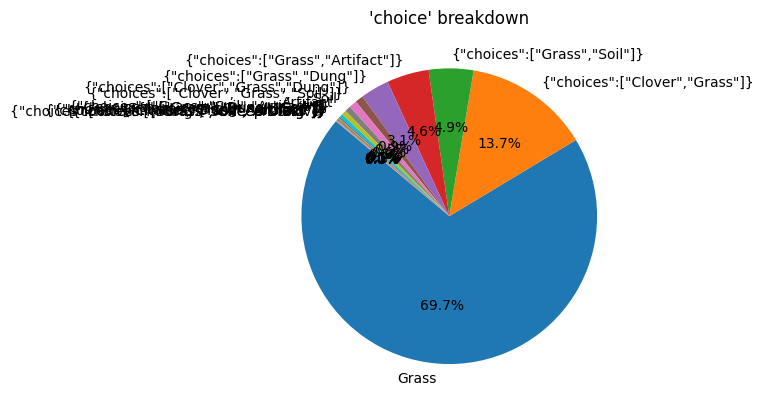

In [6]:
# view distribution of the different class choices

import matplotlib.pyplot as plt
choice_counts = main_df['choice'].value_counts()

fig, ax = plt.subplots()
ax.pie(choice_counts, labels=choice_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title("'choice' breakdown")

plt.show()

In [7]:
import json

def parse_json_choice(json_string):
  # Return the choices in form of a list e.g.:
  # input: '{"choices":["Grass","Soil"]}'
  # output: ["Grass","Soil"]
  json_data = json.loads(json_string)

  return json_data['choices']

In [8]:
# Extract all multi choice image labels
multi_choice_list_json = list(main_df[main_df['choice'].str.contains('{"choices":', na=False)]['choice'].unique())
multi_choice_list = [parse_json_choice(json_choices) for json_choices in multi_choice_list_json]
multi_choice_list

[['Grass', 'Soil'],
 ['Grass', 'Artifact'],
 ['Grass', 'Dung', 'Soil'],
 ['Grass', 'Soil', 'Artifact'],
 ['Dung', 'Soil'],
 ['Clover', 'Grass'],
 ['Grass', 'Dung'],
 ['Clover', 'Grass', 'Soil'],
 ['Clover', 'Grass', 'Dung'],
 ['Grass', 'Sheep Dung'],
 ['Grass', 'Dung', 'Artifact'],
 ['Soil', 'Artifact'],
 ['Clover', 'Grass', 'Sheep Dung'],
 ['Dung', 'Soil', 'Artifact'],
 ['Clover', 'Grass', 'Artifact']]

In [9]:
# Extract an example of each multi class label
multi_choice_image_names = []
for choice in multi_choice_list:
  for index, row in main_df.iterrows():
    if type(row['choice']) != str:
      # print("NaN encountered")
      continue
    if '{"choices":' in row['choice']:
      row_choices = parse_json_choice(row['choice'])
      if row_choices == choice:
        multi_choice_image_names.append(row['image_name'])
        break

assert len(multi_choice_list) == len(multi_choice_image_names)


In [10]:
# Show examples of images with multiclass labels

import matplotlib.pyplot as plt
from PIL import Image

image_path = 'finetune_data/content/content/flat_split/'

num_images = len(multi_choice_image_names)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))
fig.suptitle("Example images with multiple labels")
axes = axes.flatten()

for index, (image_name, label) in enumerate(zip(multi_choice_image_names, multi_choice_list)):
    filepath = f"{image_path}{image_name}"
    image = Image.open(filepath).convert('RGB')

    axes[index].imshow(image)
    axes[index].set_title(label)
    axes[index].axis('off')

Output hidden; open in https://colab.research.google.com to view.

In my opinion many of the additional labels are unnessessary; will perform label processing to assign a single label to each image in the following order of priority:

Clover > Dung > Soil > Artifact > Grass


In [11]:
# Iterate through df rows assigning a single label to each image

priority = ['Clover', 'Dung', 'Soil', 'Artifact', 'Grass']

df_labels = []
for index, row in main_df.iterrows():
  if type(row['choice']) != str:
    df_labels.append(None)
  elif '{"choices":' in row['choice']:
    row_choices = parse_json_choice(row['choice']) # row choices a list e.g. ['Grass', 'Soil']
    if 'Sheep Dung' in row_choices:
      row_choices.remove('Sheep Dung')
    label = next((item for item in priority if item in row_choices), None)
    df_labels.append(label)
  else:
    df_labels.append(row['choice'])

main_df['label'] = df_labels
main_df

,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,image_name,label
0,120,4,Grass,2024-07-11T09:42:46.334102Z,18157,/data/local-files/?d=content/content/flat_spli...,11.992,2024-07-11T09:42:46.334134Z,Bare Soil_Fran_0_0_194.jpg,Grass
1,225,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:07:20.670501Z,18166,/data/local-files/?d=content/content/flat_spli...,2.832,2024-07-11T10:07:20.670533Z,Bare Soil_Fran_0_1164_776.jpg,Soil
2,231,4,Grass,2024-07-11T10:07:38.852906Z,18168,/data/local-files/?d=content/content/flat_spli...,7.948,2024-07-11T10:07:38.852941Z,Bare Soil_Fran_0_1358_0.jpg,Grass
3,232,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:07:43.762465Z,18169,/data/local-files/?d=content/content/flat_spli...,4.056,2024-07-11T10:07:43.762499Z,Bare Soil_Fran_0_1358_194.jpg,Soil
4,235,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:08:06.786139Z,18171,/data/local-files/?d=content/content/flat_spli...,17.455,2024-07-11T10:08:06.786172Z,Bare Soil_Fran_0_1358_582.jpg,Soil
...,...,...,...,...,...,...,...,...,...,...
2923,161,3,Grass,2024-07-11T10:01:17.978649Z,98643,/data/local-files/?d=content/content/flat_spli...,1.779,2024-07-11T10:01:17.978677Z,Sheep Wool_Leon_895_582_970.jpg,Grass
2924,1063,3,Grass,2024-07-12T09:31:22.721232Z,99078,/data/local-files/?d=content/content/flat_spli...,1.625,2024-07-12T09:31:22.721263Z,Sheep Wool_Leon_900_582_1312.jpg,Grass
2925,1061,3,"{""choices"":[""Grass"",""Soil""]}",2024-07-12T09:31:17.727774Z,100732,/data/local-files/?d=content/content/flat_spli...,2.451,2024-07-12T09:31:17.727804Z,Sheep Wool_Leon_919_194_0.jpg,Soil
2926,207,3,Grass,2024-07-11T10:05:55.685947Z,106714,/data/local-files/?d=content/content/flat_spli...,2.392,2024-07-11T10:05:55.685980Z,Unclassified_Maxwell_1028_1948_776.jpg,Grass


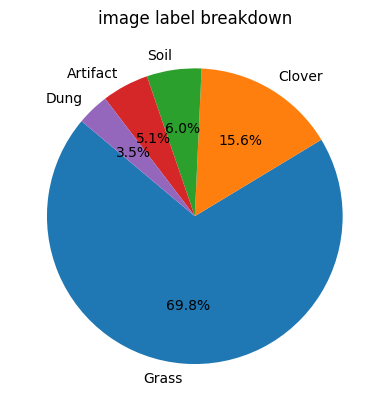

In [12]:
# view distribution of the final image labels

import matplotlib.pyplot as plt
label_counts = main_df['label'].value_counts()

fig, ax = plt.subplots()
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title("image label breakdown")

plt.show()

Very imbalanced dataset, will downsample Grass before finetuning.

In [13]:
# first remove columns with 'None' labels

main_df_noNaN = main_df.dropna(subset=['label'])

print(f"Size before drop Na = {len(main_df)}")
print(f"Size after drop Na = {len(main_df_noNaN)}")

Size before drop Na = 2928
Size after drop Na = 2927


In [14]:
# downsample grass (target = 50% grass)

from sklearn.utils import resample

df_grass = main_df_noNaN[main_df_noNaN['label'] == 'Grass']
df_not_grass = main_df_noNaN[main_df_noNaN['label'] != 'Grass']

target_grass_count = len(df_not_grass)

df_grass_downsampled = resample(df_grass,
                              replace=False,
                              n_samples=target_grass_count,
                              random_state=0)

print(f"Number of grass images before/after = {len(df_grass)}/{len(df_grass_downsampled)}")

main_df_resampled = pd.concat([df_grass_downsampled, df_not_grass])

print(f"Size of dataset before/after downsampling = {len(main_df_noNaN)}/{len(main_df_resampled)}")

Number of grass images before/after = 2042/885
Size of dataset before/after downsampling = 2927/1770


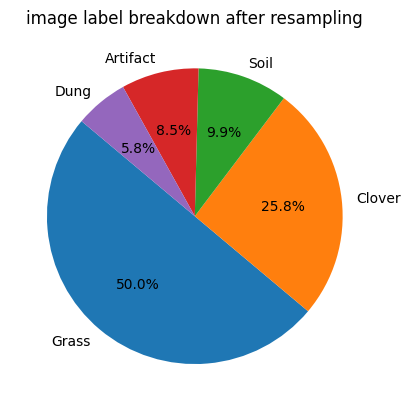

In [15]:
# View label counts after resampling

label_counts = main_df_resampled['label'].value_counts()

fig, ax = plt.subplots()
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title("image label breakdown after resampling")

plt.show()